In [25]:
#Modules and Libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
# Pull The Database For Use Datas
insurance = pd.read_csv("insurance.csv")
df = insurance.copy()

In [26]:
df.isna()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [27]:
# We can see type of our data below
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [28]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


 Perform An Exploratory Data Analysis

In [29]:
# Examine "sex" feature of our data
df["sex"].value_counts()

sex
male      676
female    662
Name: count, dtype: int64

In [30]:
# Examine "bmi" feature of our data
df["bmi"].describe().T

count    1338.000000
mean       30.663397
std         6.098187
min        15.960000
25%        26.296250
50%        30.400000
75%        34.693750
max        53.130000
Name: bmi, dtype: float64

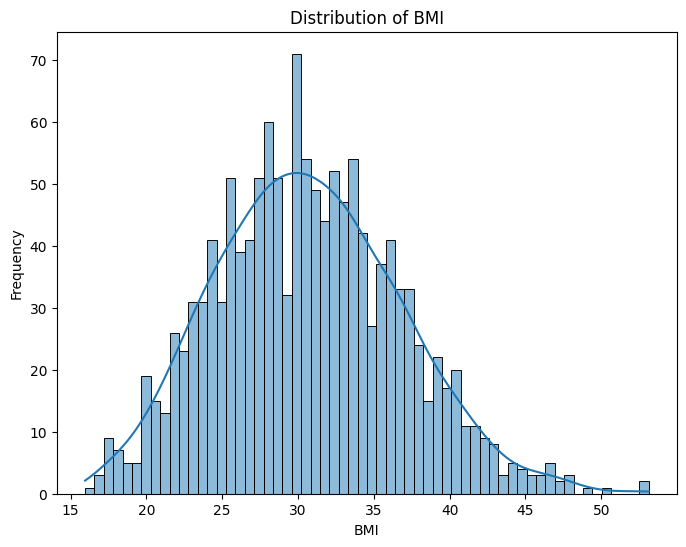

In [31]:
# Distribution of BMI Illustrated Below
plt.figure(figsize=(8, 6))
sns.histplot(df["bmi"],bins = 60,kde = True)
plt.title("Distribution of BMI")
plt.xlabel("BMI")
plt.ylabel("Frequency")
plt.show()

In [32]:
# Control of Duplicated Data
df.duplicated().sum()


1

In [33]:
#  Line of Duplicated Data

df[df.duplicated()]

,age,sex,bmi,children,smoker,region,charges
581,19,male,30.59,0,no,northwest,1639.5631


In [34]:
df.dropna(inplace=True)

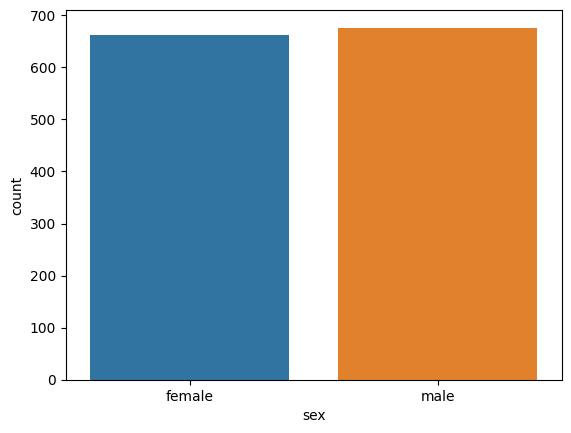

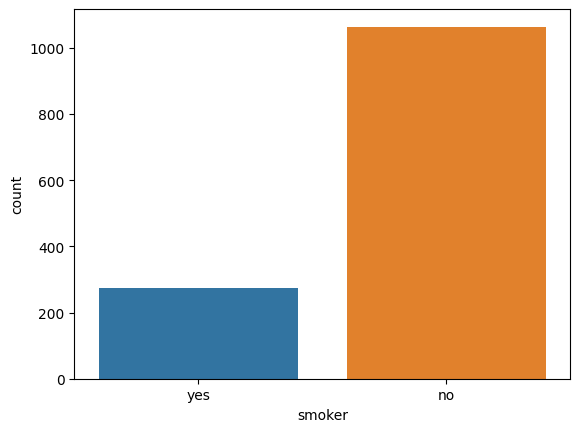

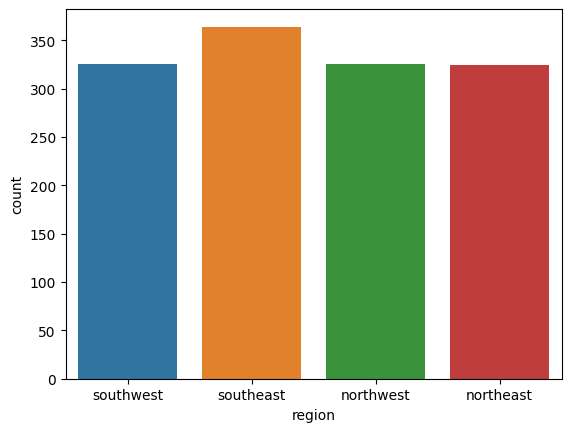

In [35]:

# We pulled and convert  all features in our data to a variable for easy use
features = df.select_dtypes("object").columns.to_list()
for each_features in features:
    sns.countplot(df,x = each_features)
    plt.show()

In [36]:
#  Examine the relationship between “smoker” and “charges”
df.groupby("smoker").agg(min_charges = ("charges","min"),mean_charges = ("charges","mean"),max_charges = ("charges","max"),)

,min_charges,mean_charges,max_charges
smoker,,,
no,1121.8739,8434.268298,36910.60803
yes,12829.4551,32050.231832,63770.42801


##########################################################
sex
How sex affects to charges
        min_charges  mean_charges  max_charges
sex                                           
female    1607.5101  12569.578844  63770.42801
male      1121.8739  13956.751178  62592.87309


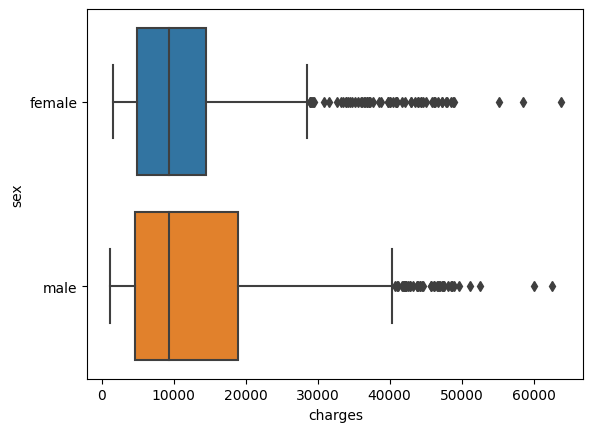

##########################################################
smoker
How smoker affects to charges
        min_charges  mean_charges  max_charges
smoker                                        
no        1121.8739   8434.268298  36910.60803
yes      12829.4551  32050.231832  63770.42801


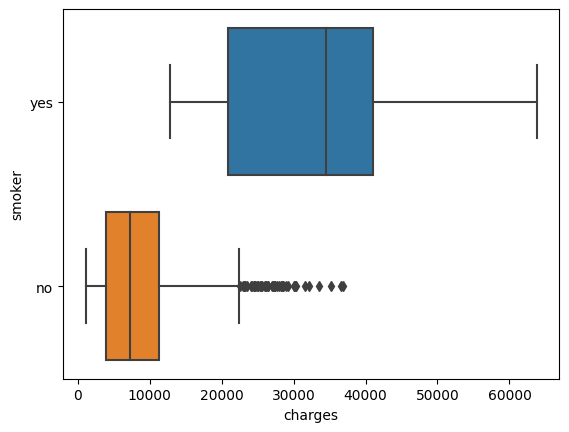

##########################################################
region
How region affects to charges
           min_charges  mean_charges  max_charges
region                                           
northeast    1694.7964  13406.384516  58571.07448
northwest    1621.3402  12417.575374  60021.39897
southeast    1121.8739  14735.411438  63770.42801
southwest    1241.5650  12346.937377  52590.82939


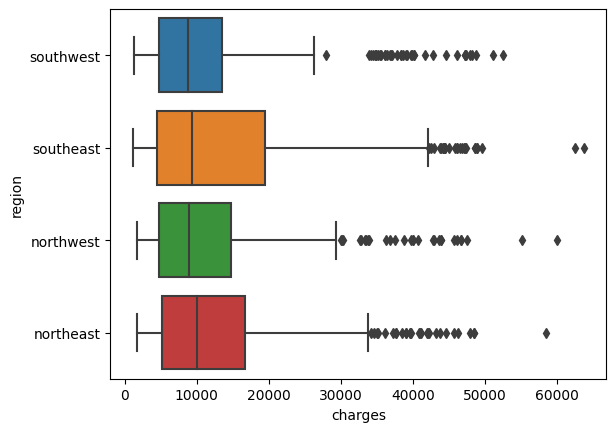

In [37]:
for each_features in features:
    
 # We can see the change of insurance charges due to each features by using code below
    
    print("##########################################################")
    print(each_features)
    print(f"How {each_features} affects to charges")
    print(df.groupby(each_features).agg(min_charges=("charges","min"),mean_charges= ("charges","mean"),max_charges= ("charges","max")))
    
    
# We can see the overlier points of each features on our database
 
    sns.boxplot(df,x = "charges",y = each_features)
    plt.show()

In [38]:
# Examine the relationship between “smoker” and “region”.

smokers_and_regions = df.groupby(["smoker","region"]).size().unstack()
smokers_and_regions

region,northeast,northwest,southeast,southwest
smoker,,,,
no,257,267,273,267
yes,67,58,91,58


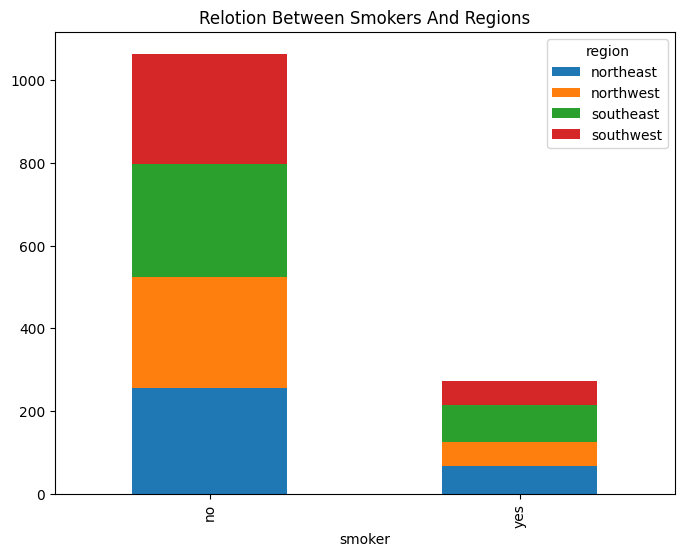

In [39]:
smokers_and_regions = df.groupby(["smoker","region"]).size().unstack()
smokers_and_regions
smokers_and_regions.plot(kind="bar",stacked=True,figsize=(8,6))
plt.title("Relotion Between Smokers And Regions")
plt.show()

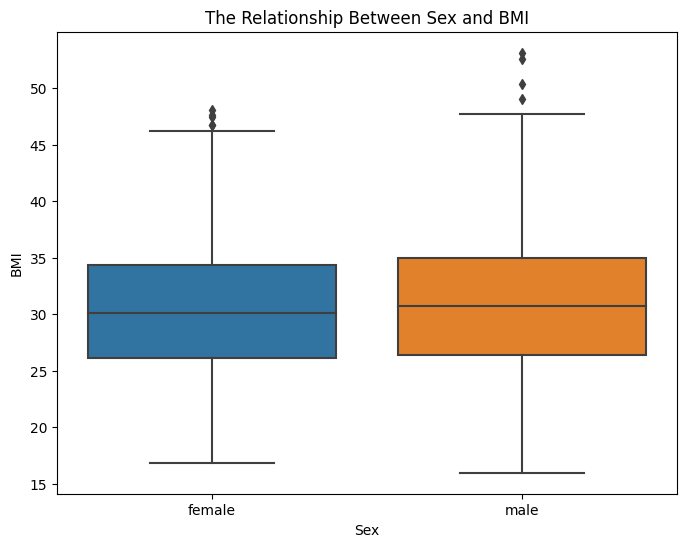

In [40]:
# Examine the relationship between “bmi” and “sex”.
plt.figure(figsize=(8,6))
sns.boxplot(x="sex", y="bmi", data=df)
plt.title("The Relationship Between Sex and BMI")
plt.xlabel("Sex")
plt.ylabel("BMI")
plt.show()
     


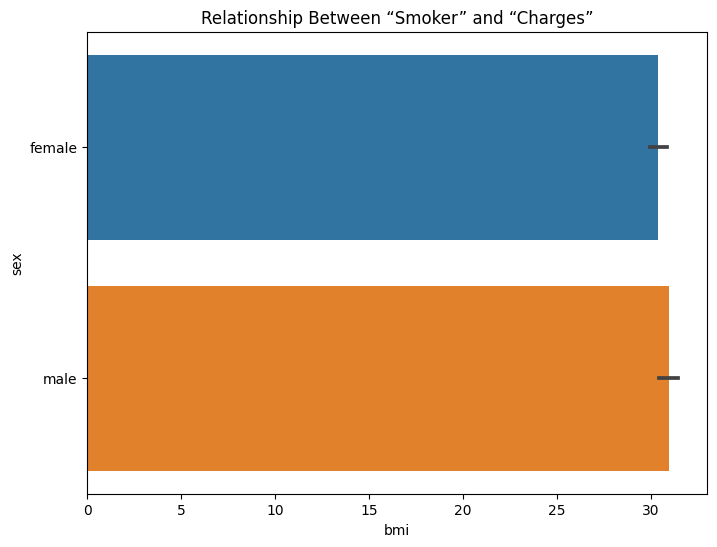

In [41]:
plt.figure(figsize=(8,6))
plt.title('Relationship Between “Smoker” and “Charges”')
sns.barplot(data=df, x=df['bmi'], y=df['sex']);

In [42]:
# Find the "region" with the most "children"
sum_region_children = df.groupby("region")["children"].sum()
max_children_region = sum_region_children.idxmax()
counter_max_children = sum_region_children[max_children_region]
print(max_children_region,counter_max_children)

southeast 382


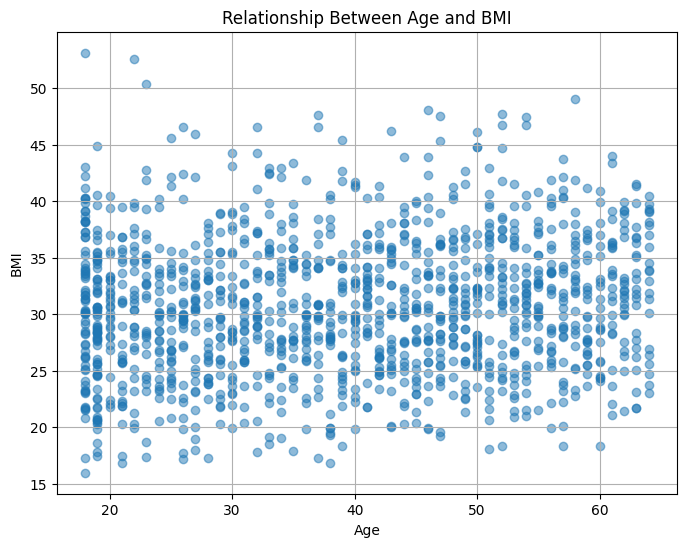

In [43]:
# Examine the relationship between “age” and “bmi”.

plt.figure(figsize=(8, 6))
plt.scatter(df["age"], df["bmi"], alpha=0.5)
plt.title("Relationship Between Age and BMI")
plt.xlabel("Age")
plt.ylabel("BMI")
plt.grid(True)
plt.show()
     

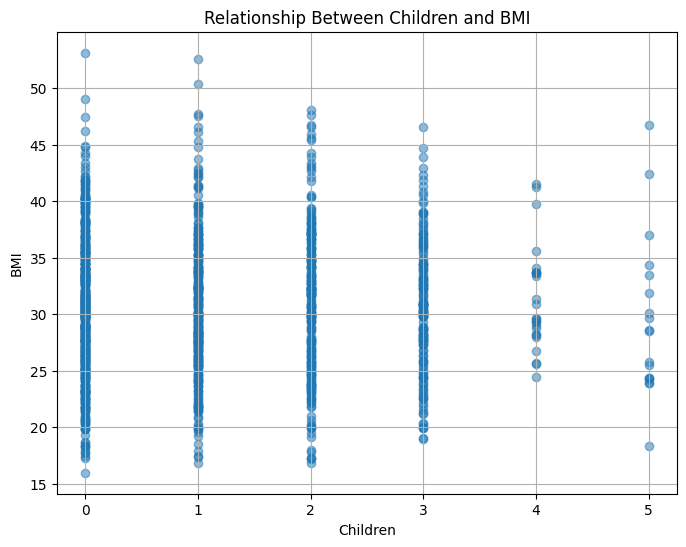

In [44]:
# Examine the relationship between “bmi” and “children”
plt.figure(figsize=(8, 6))
plt.scatter(df["children"], df["bmi"], alpha=0.5)
plt.title("Relationship Between Children and BMI")
plt.xlabel("Children")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

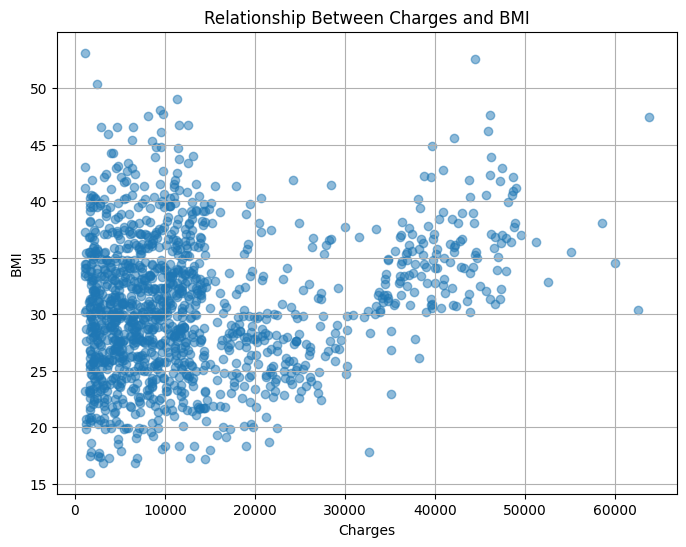

In [45]:
# Examine the relationship between “bmi” and “charges
plt.figure(figsize=(8, 6))
plt.scatter(df["charges"], df["bmi"], alpha=0.5)
plt.title("Relationship Between Charges and BMI")
plt.xlabel("Charges")
plt.ylabel("BMI")
plt.grid(True)
plt.show()

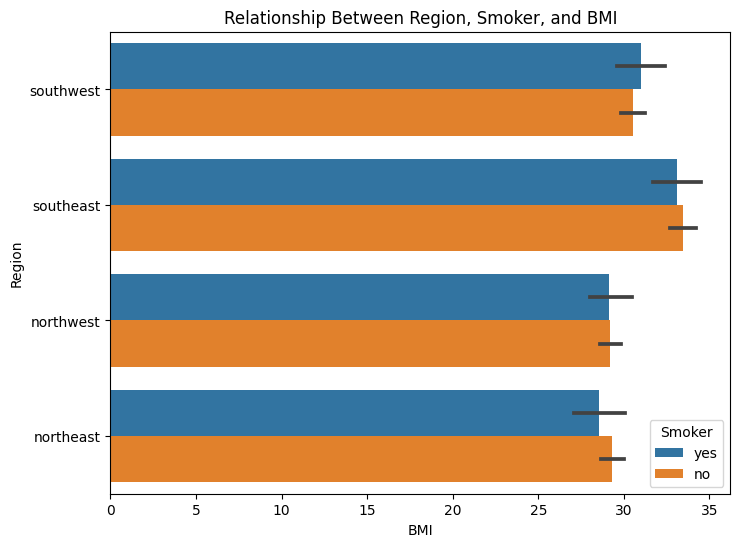

In [46]:
# Examine the relationship between “region”, “smoker” and “bmi” using bar plot.
plt.figure(figsize=(8,6))
sns.barplot(x="bmi", y="region", hue="smoker", data=df)
plt.title("Relationship Between Region, Smoker, and BMI")
plt.xlabel("BMI")
plt.ylabel("Region")
plt.legend(title="Smoker")
plt.show()

Data Preprocessing

In [47]:
# Is there an outlier in the "bmi" variable? Please review.
from scipy import stats
z_scores = stats.zscore(df["bmi"])
threshold = 3
outliers = abs(z_scores) > threshold
outlier_values = df["bmi"][outliers]

print("Outlier values:", outlier_values)

Outlier values: 116     49.06
847     50.38
1047    52.58
1317    53.13
Name: bmi, dtype: float64


In [48]:
clean_df = df[~outliers] #cleaning outlier values.
encode_df = pd.get_dummies(clean_df, columns=["region", "smoker", "sex"], prefix=["region", "smoker", "sex"])

In [49]:
from sklearn.model_selection import train_test_split

X = encode_df.drop("charges", axis=1)
y = encode_df["charges"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Model Selection

In [50]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(encode_df.drop("charges", axis=1))
scaled_df = pd.DataFrame(X_scaled, columns=encode_df.drop("charges", axis=1).columns)


In [51]:
def crossval(model):
    scores = cross_val_score(model, X_train, y_train, scoring="neg_mean_squared_error", cv=10)
    forest_reg_rmse_scores = np.sqrt(-scores)
    return forest_reg_rmse_scores.mean()

In [52]:
linear_regressor = LinearRegression()
linear_model = linear_regressor.fit(X_train,y_train)
linear_pred = linear_regressor.predict(X_test)
crossval(linear_model)

6100.748864465365

In [53]:
decision_tree_regressor = DecisionTreeRegressor()
decision_tree_regression_model = DecisionTreeRegressor(max_depth=3, random_state=42)
decision_tree_regression_model = decision_tree_regressor.fit(X_train, y_train)
decision_tree_regression_pred = decision_tree_regression_model.predict(X_test)
crossval(decision_tree_regression_model)

6506.701900642109

In [54]:
#Best Performing Model
random_forest_regression_model = RandomForestRegressor()
random_forest_regressor = RandomForestRegressor(random_state=42)
Forest_model = random_forest_regressor.fit(X_train,y_train)
RandomForest_pred = Forest_model.predict(X_test)
crossval(Forest_model)

4827.4917304380415

 Hyper-parameter Optimization

In [55]:
param_grid = [
    { "n_estimators": [10, 20, 30, 40, 50], "max_depth": [3, 5, 7, 9, 11] }, 
    { "bootstrap": [False], "n_estimators": [3, 10], "max_depth": [3, 5, 7, 9, 11]}
]

In [56]:
random_forest_regressor = RandomForestRegressor(random_state=42)
forest_grid_search = GridSearchCV(random_forest_regressor, param_grid, cv=5, scoring='neg_mean_squared_error', refit=True)
forest_grid_search.fit(X_scaled, y)
forest_grid_search.best_params_

{'max_depth': 5, 'n_estimators': 50}

Model Evaluation

In [57]:
all_of_the_best_model = forest_grid_search.best_estimator_

y_pred = all_of_the_best_model.predict(X_scaled)

In [58]:
mse = mean_squared_error(y, y_pred)
mae = mean_absolute_error(y, y_pred)
r2 = r2_score(y, y_pred)

final_scores = [mse,mae,r2]
final_scores_labels = ["mse","mae","r2"]

for i,j in zip(final_scores,final_scores_labels):
    print(f"{j} : {i}")

mse : 16536448.36138292
mae : 2273.1634205258656
r2 : 0.8867757965112212
